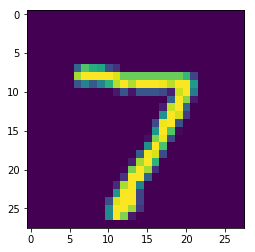

7


In [87]:
# MNIST
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

plt.imshow(X_test[0].reshape(28,28))
plt.show()
print(Y_test[0])

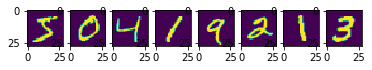

5 0 4 1 9 2 1 3 

In [100]:
for i in range(0,8):
    plt.subplot(1,8,i+1)
    plt.imshow(X_train[i])
plt.show()
for i in range(0,8):
    print(Y_train[i], end=' ')

Epoch 1/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2963 - acc: 0.9159
Epoch 2/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.1434 - acc: 0.9579
Epoch 3/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.1046 - acc: 0.9684
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0824 - acc: 0.9752
Epoch 5/5
10000/10000 [==============================] - 0s 35us/step
acc: 97.38%


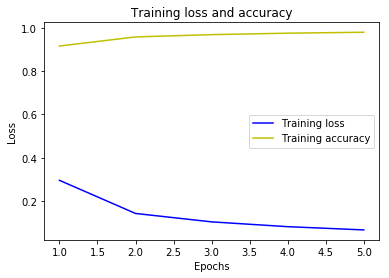

In [42]:
#DNN - MNIST

#0.사용할 패키지 불러오기
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

#랜덤시드 고정시키기
np.random.seed(5)

#1.데이터 준비하기 & 2.데이터셋 분할
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 28*28*1).astype('float32') / 255.0
X_test = X_test.reshape(10000, 28*28*1).astype('float32') / 255.0

#2.1. One-hot encoding
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

#3.모델 구성하기 
model = Sequential()
model.add(Dense(64, input_dim=28*28*1, activation='relu'))
model.add(Dense(10, activation='softmax'))

#4.모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

#5.모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=5, batch_size=32)

#6.모델 평가하기    
scores = model.evaluate(X_test, Y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

#6.1. Epoch, loss and acc 그래프
loss = hist.history['loss']
acc = hist.history['acc']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s 226us/step
acc: 97.94%


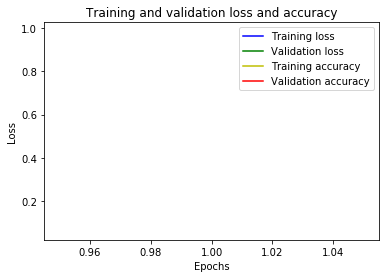

In [79]:
#CNN

#0.사용할 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

#랜덤시드 고정시키기
np.random.seed(5)

#1.데이터 준비하기 & 2.데이터셋 분할
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0
Y_test_var = Y_test

# Validation set
X_val = X_train[50000:60000]
X_train = X_train[:50000]
Y_val = Y_train[50000:60000]
Y_train = Y_train[:50000]

#2.1. One-hot encoding
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

#3.모델 구성하기
input_shape = (28,28,1)
num_classes = 10

model = Sequential()
#Conv2D(filters(Depth), (kernel_height, kernel_width), padding='valid'(default) or 'same'(zero padding),
#       activation= none(default), use_bias = True(default), strides=(1, 1)(default))
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation = 'relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))        
model.add(Dense(num_classes, activation='softmax'))
#model.summary()

#4.모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

#5.모델 학습시키기
#5.1. Early Stopping
callbacks_list = [
    EarlyStopping(
    monitor='val_acc',
    patience=10,
    ),
     ModelCheckpoint(
     filepath='multi_model.h5',
     monitor='val_loss',
     save_best_only=True,
     )
]

hist = model.fit(X_train, Y_train, epochs=1, batch_size=32, callbacks=callbacks_list,
                 validation_data=(X_val, Y_val))

#6.모델 평가하기    
scores = model.evaluate(X_test, Y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

#6.1. Epoch, loss and acc 그래프
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['acc']
val_acc = hist.history['val_acc']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')

plt.title('Training and validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#7.예측하기
Y_predict = model.predict(X_test)
# Y_predict

#7.1. argmax
result = []
for i in range(len(Y_predict)):
    label = np.argmax(Y_predict[i])
    result.append(label)

df = pd.DataFrame(result)
df.insert(0,'Y_test',Y_test_var)
df = df.rename(columns = {0: 'Y_predict'})
df.to_csv("predict_CNN.csv", index=False)   